In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [10]:
train_split_percent = 0.7

In [14]:
size = X.shape[0]
X_train = X[:int(train_split_percent * size),:]
X_test = X[int(train_split_percent * size):,:]
y_train = y[:int(train_split_percent * size)]
y_test = y[int(train_split_percent * size):]

<b>Feature Scaling</b>

In [19]:
#Standardizing the X_train and X_test daatsets
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y

In [23]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((14447, 1), (6193, 1), (6193, 1))

In [24]:
y_train

array([[2.26450396],
       [1.42570389],
       [1.36865479],
       ...,
       [0.26065427],
       [0.82044858],
       [1.14045838]])

In [25]:
n_neigh = 10
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
    y_pred[row] = y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]].mean()* sigma_y + mu_y
    
#Finding the root mean squared error 

RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print(RMSE)

0.8297673466588273


In [26]:
k_list = [x for x in range(1,50,1)]

# Calculating the distance matrix using numpy broadcasting technique 
distance = np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

#Sorting each data points of the distance matrix to reduce computational effort 
sorted_distance = np.argsort(distance, axis = 0)

#The knn function takes in the sorted distance and returns the RMSE of the 
def knn(X_train,X_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(X_test)):
        
        #Transforming the y_train values to adjust the scale. 
        y_pred[row] = y_train[sorted_distance[:,row][:k]].mean() * sigma_y + mu_y

    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE

#Storing the RMSE values in a list for each k value 
rmse_list = []
for i in k_list:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,sorted_distance,i))

min_rmse_k_value = k_list[rmse_list.index(min(rmse_list))]

#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,sorted_distance,min_rmse_k_value)
optimal_RMSE

0.8277836496033618

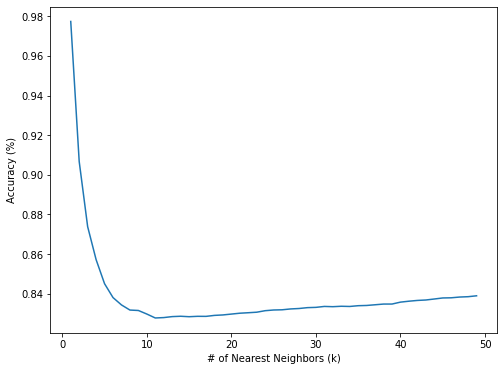

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), rmse_list)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');